# GIS Notebook
A collection of all my learnings in GIS and Remote Sensing

# Table of Contents
1. [Remove watermarks from BHUVAN satellite images](#watermark-remove)

## Remove watermarks from BHUVAN satellite images <a class="anchor" id="watermark-remove"></a>

In [7]:
import rasterio
from rasterio.crs import CRS

In [3]:
raster = rasterio.open('notebook_data/watermark.tif')
raster_array = raster.read()

This tif file has `bhuvan` watermarks as seen in the sample picture. These watermarks mess with any pixel level stats that you might want to calculate.
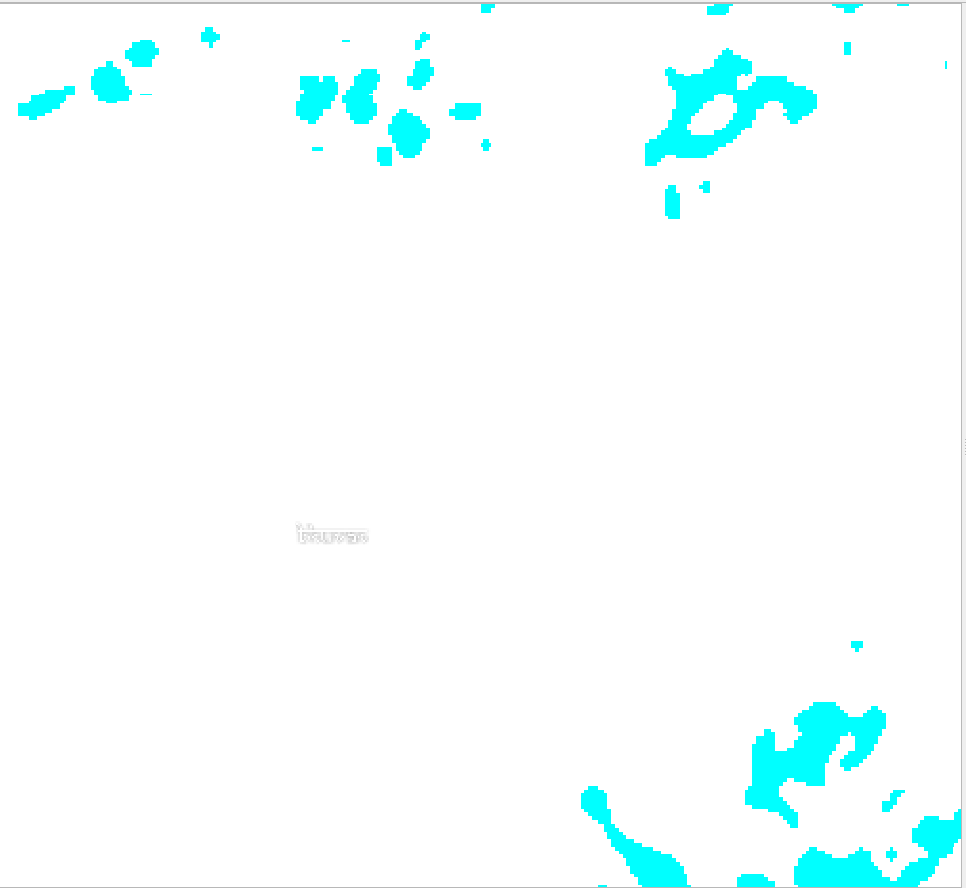

I observed that if Band4 is 255 it is definitely a inundated pixel. So I use this observation to remove water mark.

In [5]:
#If Band4 is less than 255 - convert it to zero -- uninundated pixel
raster_array[3,:,:][(raster_array[3,:,:]<255.0)] = 0
#If Band4 is  255 - convert it to 1 -- inundated pixel
raster_array[3,:,:][(raster_array[3,:,:]==255.0)] = 1

In [8]:
# Configure new raster
meta = raster.meta
meta['compress'] = 'deflate'
meta['count'] = 1 #Only one band Band 4 is enough to identify inundation
meta['dtype'] = 'uint8'
meta['crs'] = CRS.from_epsg(4326)
meta['transform'] = raster.transform

In [9]:
# Save the modified raster data to a new TIF file.
# Only Band 4 is enough to identify inundation - It is written in Band1 of new raster
with rasterio.open('notebook_data/watermarkremoved.tif', 'w', **meta) as dst:
    dst.write(raster_array[3,:,:], 1)

Watermark remvoed from the tif
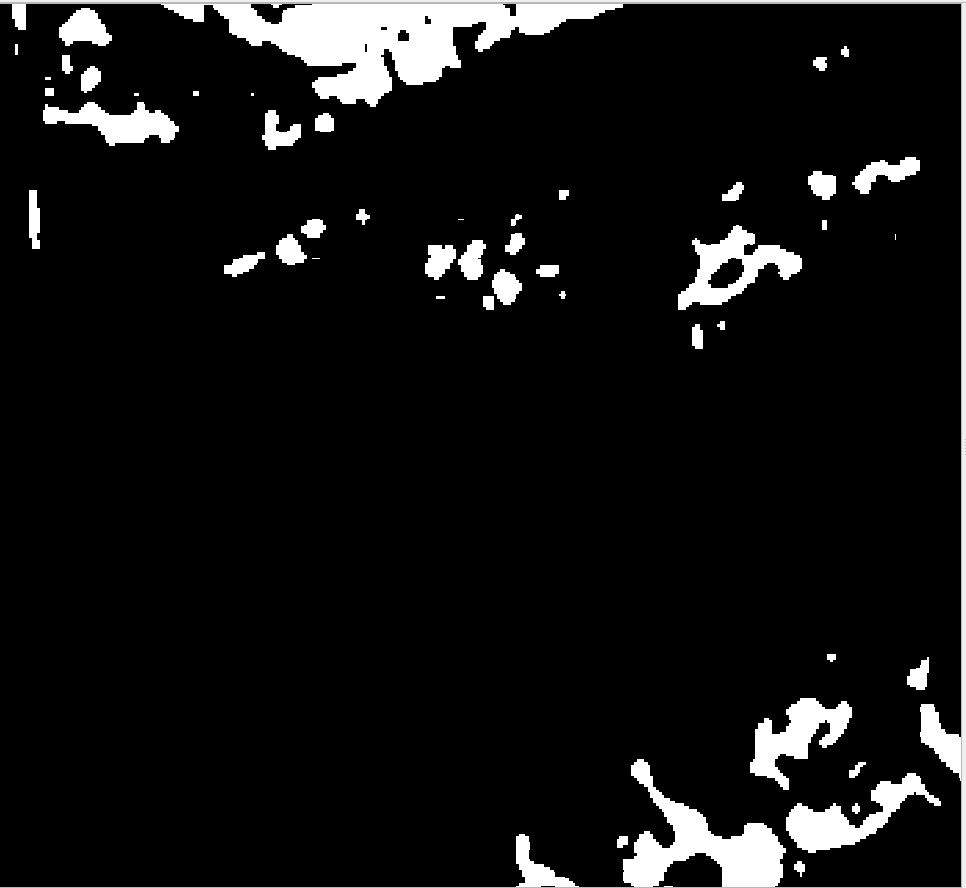